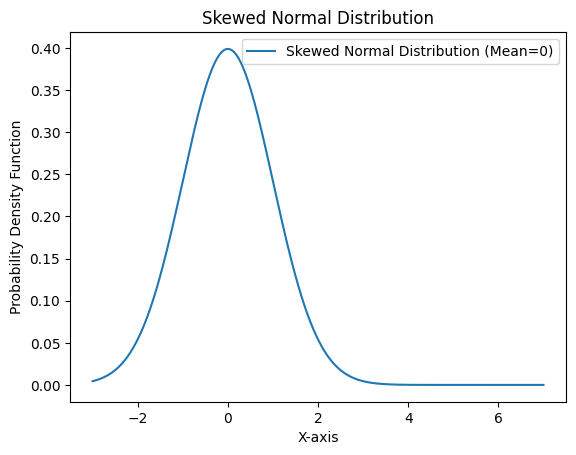

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_skewed_normal(mean, std_dev, lower_bound, upper_bound):
    # Generate data points for the normal distribution
    x = np.linspace(lower_bound, upper_bound, 1000)
    # Calculate the probability density function (PDF) for the normal distribution
    pdf = norm.pdf(x, mean, std_dev)
    
    # Plot the skewed normal distribution
    plt.plot(x, pdf, label=f'Skewed Normal Distribution (Mean={mean})')

    # Set plot labels and legend
    plt.title('Skewed Normal Distribution')
    plt.xlabel('X-axis')
    plt.ylabel('Probability Density Function')
    plt.legend()

    # Show the plot
    plt.show()

# Example usage
mean_value = 0  # Adjust mean to control skewness (peak orientation)
std_deviation = 1
lower_bound_value = -3
upper_bound_value = 7

plot_skewed_normal(mean_value, std_deviation, lower_bound_value, upper_bound_value)



In [4]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
from scipy.stats import binom
from scipy.stats import uniform
import pandas as pd
num_heads = np.arange(0, 101, 1)
head_prob = np.arange(0, 1.01, 0.01)

# this is the grid
coin = pd.DataFrame([(x, y) for x in num_heads for y in head_prob])
coin.columns = ["num_heads", "head_prob"]

coin["prior"] = uniform.pdf(coin["head_prob"])
coin["likelihood"] = binom.pmf(coin["num_heads"], 100, coin["head_prob"])
coin["posterior_prob"] = coin["prior"] * coin["likelihood"]
coin["posterior_prob"] /= coin["posterior_prob"].sum()

In [11]:
[(x, y) for x in num_heads for y in head_prob]

[(0, 0.0),
 (0, 0.01),
 (0, 0.02),
 (0, 0.03),
 (0, 0.04),
 (0, 0.05),
 (0, 0.06),
 (0, 0.07),
 (0, 0.08),
 (0, 0.09),
 (0, 0.1),
 (0, 0.11),
 (0, 0.12),
 (0, 0.13),
 (0, 0.14),
 (0, 0.15),
 (0, 0.16),
 (0, 0.17),
 (0, 0.18),
 (0, 0.19),
 (0, 0.2),
 (0, 0.21),
 (0, 0.22),
 (0, 0.23),
 (0, 0.24),
 (0, 0.25),
 (0, 0.26),
 (0, 0.27),
 (0, 0.28),
 (0, 0.29),
 (0, 0.3),
 (0, 0.31),
 (0, 0.32),
 (0, 0.33),
 (0, 0.34),
 (0, 0.35000000000000003),
 (0, 0.36),
 (0, 0.37),
 (0, 0.38),
 (0, 0.39),
 (0, 0.4),
 (0, 0.41000000000000003),
 (0, 0.42),
 (0, 0.43),
 (0, 0.44),
 (0, 0.45),
 (0, 0.46),
 (0, 0.47000000000000003),
 (0, 0.48),
 (0, 0.49),
 (0, 0.5),
 (0, 0.51),
 (0, 0.52),
 (0, 0.53),
 (0, 0.54),
 (0, 0.55),
 (0, 0.56),
 (0, 0.5700000000000001),
 (0, 0.58),
 (0, 0.59),
 (0, 0.6),
 (0, 0.61),
 (0, 0.62),
 (0, 0.63),
 (0, 0.64),
 (0, 0.65),
 (0, 0.66),
 (0, 0.67),
 (0, 0.68),
 (0, 0.6900000000000001),
 (0, 0.7000000000000001),
 (0, 0.71),
 (0, 0.72),
 (0, 0.73),
 (0, 0.74),
 (0, 0.75),
 (0, 0.7

/home/tristannew/.cache/pypoetry/virtualenvs/earth-data-science-textbook-VbL9wLaR-py3.10/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [slope, intercept]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 2 seconds.
/home/tristannew/.cache/pypoetry/virtualenvs/earth-data-science-textbook-VbL9wLaR-py3.10/lib/python3.10/site-packages/arviz/utils.py:187: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
The acceptance probability does not match the target. It is 0.8854197397376139, but should be close to 0.8. Try to increase the number of tuning steps.


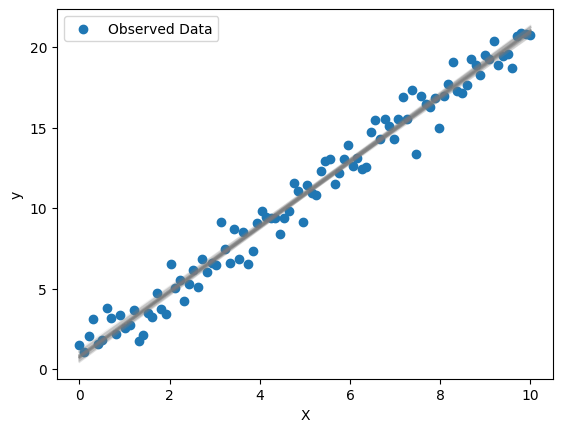

In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100)
true_slope = 2
true_intercept = 1
y = true_intercept + true_slope * X + np.random.normal(0, 1, size=len(X))

# Model specification
with pm.Model() as model:
    # Prior distributions for intercept and slope
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    slope = pm.Normal('slope', mu=0, sigma=10)
    
    # Likelihood
    likelihood = pm.Normal('likelihood', mu=intercept + slope * X, sigma=1, observed=y)

    # Sampling
    trace = pm.sample(draws=2000, tune=1000, chains=2)

# Plot the data and regression lines from posterior samples
plt.scatter(X, y, label='Observed Data')
for i in range(50):  # Plot 50 regression lines from posterior samples
    intercept_sample = trace['intercept'][i]
    slope_sample = trace['slope'][i]
    plt.plot(X, intercept_sample + slope_sample * X, color='gray', alpha=0.1)

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [16]:
import arviz as az
import pandas as pd


len(trace.slope)

4000